In [32]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [36]:
import cv2

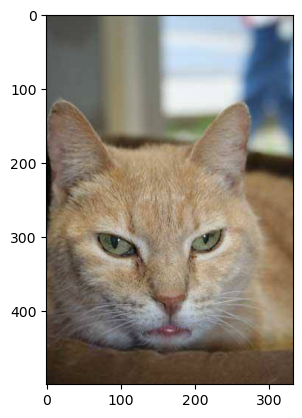

In [4]:
# display dog image
img = mpimg.imread('C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/train/cat.41.jpg')
imgplt = plt.imshow(img)
plt.show()

In [5]:
file_names = os.listdir('train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 11501
Number of cat images = 11501


Resizing all the images

In [6]:
#creating a directory for resized images
os.mkdir('C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/resized image')

In [7]:
original_folder = 'C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/train1/cats/'
resized_folder = 'C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/resized image/'

for i in range(1000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [8]:
original_folder = 'C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/train1/dogs/'
resized_folder = 'C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/resized image/'

for i in range(1000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

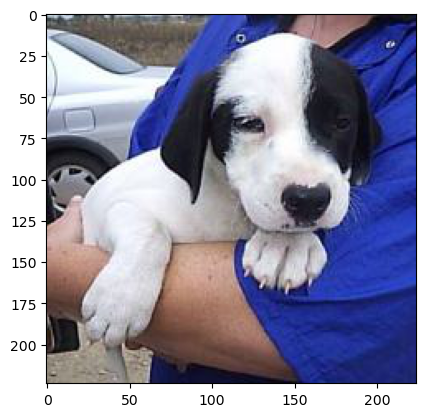

In [9]:
# display resized dog image
img = mpimg.imread('C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/resized image/dog.10223.jpg')
imgplt = plt.imshow(img)
plt.show()

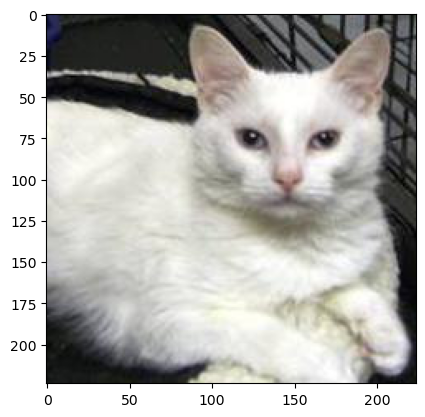

In [10]:
# display resized cat image
img = mpimg.imread('C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/resized image/cat.10844.jpg')
imgplt = plt.imshow(img)
plt.show()

# Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [11]:
# creaing a for loop to assign labels
filenames = os.listdir('C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/resized image/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [12]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


# Converting all the resized images to numpy arrays

In [13]:
import cv2
import glob

In [14]:
image_directory = 'C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/resized image/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [15]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [181 207 207]
   [169 199 200]
   [161 194 197]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [176 202 202]
   [167 196 200]
   [164 197 200]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [168 194 194]
   [165 194 198]
   [168 200

In [16]:
type(dog_cat_images)

numpy.ndarray

In [17]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [18]:
X = dog_cat_images
Y = np.asarray(labels)

# Train Test Split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -- training images

400 -- test images

In [21]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [22]:
print(X_train_scaled)

[[[[0.07843137 0.08235294 0.12156863]
   [0.03137255 0.03529412 0.0745098 ]
   [0.03137255 0.03921569 0.07058824]
   ...
   [0.09411765 0.14901961 0.21960784]
   [0.09411765 0.14509804 0.20784314]
   [0.10588235 0.15686275 0.21960784]]

  [[0.09019608 0.09411765 0.13333333]
   [0.05098039 0.05490196 0.09411765]
   [0.04313725 0.05098039 0.08235294]
   ...
   [0.09411765 0.14901961 0.21960784]
   [0.09803922 0.14901961 0.21176471]
   [0.10588235 0.15686275 0.21960784]]

  [[0.10196078 0.10588235 0.14509804]
   [0.05882353 0.0627451  0.10196078]
   [0.04705882 0.05490196 0.08627451]
   ...
   [0.09411765 0.14901961 0.21960784]
   [0.09803922 0.14901961 0.21176471]
   [0.10588235 0.15686275 0.21960784]]

  ...

  [[0.09803922 0.16078431 0.25098039]
   [0.09803922 0.16078431 0.25098039]
   [0.09019608 0.15686275 0.25882353]
   ...
   [0.21960784 0.30980392 0.39607843]
   [0.21568627 0.30196078 0.4       ]
   [0.21568627 0.30196078 0.4       ]]

  [[0.09019608 0.15294118 0.24313725]
   [0.0

# Building the Neural Network

In [23]:
import tensorflow as tf
import tensorflow_hub as hub

ModuleNotFoundError: No module named 'tensorflow_hub'

In [24]:
pip install tensorflow-hub


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow-hub from https://files.pythonhosted.org/packages/e5/50/00dba77925bf2a0a1e45d7bcf8a69a1d2534fb4bb277d9010bd148d2235e/tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tf-keras>=2.14.1 from https://files.pythonhosted.org/packages/19/26/ca8a6cca61f2a44f1e7ee71ebdb9c8dfbc4371f418db811cdca4641f6daa/tf_keras-2.15.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 667.8 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.7 MB 1.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.7 MB 950.9 kB/s eta 0:00:02
   --- ------------------------------------ 0.2/1.7 MB 1.0 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.7 MB 1.6 MB/s eta 0:00:01
   ---------- ---------------------------

In [25]:
import tensorflow_hub as hub

In [26]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [27]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [28]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [29]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5



50/50 [==============================] - 17s 216ms/step - loss: 0.2317 - acc: 0.8981
Epoch 2/5
50/50 [==============================] - 11s 213ms/step - loss: 0.0721 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 11s 211ms/step - loss: 0.0564 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 11s 211ms/step - loss: 0.0445 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 11s 211ms/step - loss: 0.0394 - acc: 0.9912


In [30]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 4s 220ms/step - loss: 0.0769 - acc: 0.9725
Test Loss = 0.07694146782159805
Test Accuracy = 0.9725000262260437


# Predictive System

Path of the image to be predicted: C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/cute cat.jpg
1/1 [==============================] - 1s 989ms/step
[[ 3.5312655 -4.159844 ]]
0
The image represents a Cat


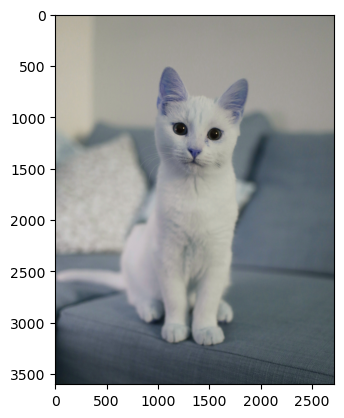

In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: C:/Users/ankit/python/python project/Dog or cat  image classification/dogscats/cute-shepherd-dog-posing.jpg
1/1 [==============================] - 0s 60ms/step
[[-1.113422  1.903377]]
1
The image represents a Dog


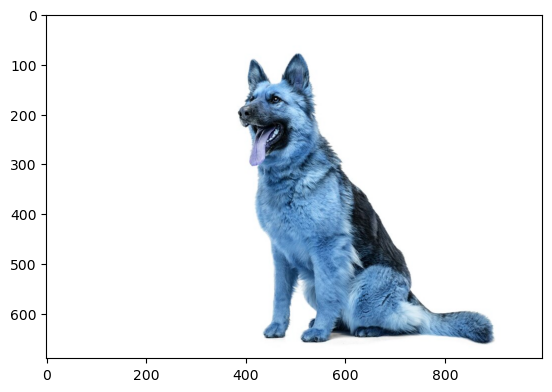

In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')